In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
import warnings
warnings.filterwarnings('ignore')

In [177]:
df = pd.read_csv('MonthWiseMarketArrivals.csv')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [178]:
def fetch_count_and_percent_of_null(data):  # data is df
    nv = data.isnull().sum()  # nv = null values
    nv = nv[nv>0]
    res = pd.DataFrame({'Feature':nv.index,'Count_Null':nv.values,
                       'Percent_Null':(nv.values/data.shape[0])*100})
    res = res.sort_values('Percent_Null',ascending=False)
    return res


In [179]:
fetch_count_and_percent_of_null(df)

,Feature,Count_Null,Percent_Null


In [180]:
df2=df[df["state"]=="MS"]

In [181]:
df["date"].duplicated().sum()

9985

In [182]:
df2.shape

(4354, 10)

In [183]:
df2['date'].duplicated().sum()

4112

In [184]:
df2["state"].value_counts()

MS    4354
Name: state, dtype: int64

In [185]:
df2=d.groupby("date")[["priceMod"]].mean()

In [186]:
df2.columns

Index(['priceMod'], dtype='object')

In [174]:
df2=df2.drop(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax', 'state', 'city'],axis=1)


KeyError: "['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax', 'state', 'city'] not found in axis"

## Q1

In [126]:
df2=df2.set_index("date")
df2.head()

,priceMod
date,
2002-01-01,212
2004-01-01,618
2005-01-01,266
2006-01-01,261
2007-01-01,795


In [8]:
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [9]:
df["date"]=pd.to_datetime(df['date'],format="%B-%Y")

In [10]:
df["date"]

0       2005-01-01
1       2006-01-01
2       2010-01-01
3       2011-01-01
4       2012-01-01
           ...    
10222   2011-12-01
10223   2012-12-01
10224   2013-12-01
10225   2014-12-01
10226   2015-12-01
Name: date, Length: 10227, dtype: datetime64[ns]

In [18]:
df["date"].min()

Timestamp('1996-01-01 00:00:00')

In [17]:
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

In [19]:
df.sort_values(by="date")

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
5399,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
5420,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
5441,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
5461,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
5481,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01
...,...,...,...,...,...,...,...,...,...,...
8226,RAIPUR(CHGARH),February,2016,4300,950,1142,1077,HR,RAIPUR,2016-02-01
3644,INDORE(MP),February,2016,97178,104,856,575,MP,INDORE,2016-02-01
10106,YEOLA(MS),February,2016,272527,347,984,730,MS,YEOLA,2016-02-01
8962,SATANA(MS),February,2016,90142,281,1130,806,MS,SATANA,2016-02-01


In [159]:
d1 = pd.date_range(start="1996-01-01",end="2016-02-01", freq='MS') # Y = Year Start 
print(d1.shape)

(242,)


In [21]:
print(len(set(d1).intersection(set(df['date']))))
print(len(set(d1).difference(set(df['date']))))

242
0


In [30]:
#now there is no null values in date and date are in asc order and sequence





In [31]:
pt1 = pd.pivot_table(data=df,columns=['year'],index=['month'],values=['priceMod'])
pt1

priceMod                                                           \
year          1996    1997         1998        1999        2000        2001   
month                                                                         
April        254.0  214.00   243.300000  341.272727  202.636364  247.600000   
August       340.0  195.00  1287.555556  397.000000  254.600000  498.300000   
December     385.0  688.75  1044.250000  296.636364  498.300000  403.307692   
February     186.0  271.00   822.000000  283.090909  215.636364  333.500000   
January      226.0  290.00  1049.571429  491.777778  226.727273  478.100000   
July         368.0  148.20   829.111111  425.100000  203.300000  333.700000   
June         367.0  195.00   566.555556  417.500000  187.800000  284.900000   
March        243.0  273.00   399.333333  246.727273  208.363636  303.500000   
May          269.0  213.00   297.000000  451.454545  198.900000  216.700000   
November     376.0  617.40  1436.625000  434.900000  559.600000  699.363636   
October      492.0  322.00  2116.900000  556.200000  415.700000  511.272727   
September    317.0  240.60  1723.666667  606.600000  297.100000  465.363636   

                                                            ...               \
year             2002        2003        2004         2005  ...         2007   
month                                                       ...                
April      205.181818  323.565217  351.318182   311.576923  ...   540.000000   
August     450.000000  478.400000  427.522727   571.622951  ...  1101.952381   
December   314.789474  615.814815  394.704545   667.450000  ...   578.450000   
February   237.142857  192.695652  718.523810   344.707692  ...  1000.920635   
January    281.391304  231.681818  775.200000   386.555556  ...   879.123077   
July       356.045455  461.458333  384.744186   388.966102  ...   834.301587   
June       299.136364  431.440000  372.333333   334.338983  ...   734.766667   
March      208.400000  245.000000  460.000000   300.927273  ...   707.030769   
May        208.285714  344.833333  337.363636   313.262295  ...   530.229508   
November   463.700000  544.840000  441.244444  1049.206897  ...   846.155172   
October    558.409091  695.791667  493.622222  1060.166667  ...  1298.464286   
September  463.545455  517.692308  424.204545   861.619048  ...  1308.166667   

                                                                            \
year              2008         2009         2010         2011         2012   
month                                                                        
April       358.316667   583.290323   589.884058   533.725806   500.650000   
August      778.620000   717.879310   841.621212  1036.200000   727.633333   
December   1064.418182  1411.971014  2403.606061   662.698413  1246.377049   
February    336.866667  1077.274194  1105.985294  1023.078125   448.288136   
January     389.370968  1231.250000  1316.782609  2565.171875   481.322581   
July        607.385965   690.898305   705.716418   795.225806   634.622951   
June        391.964286   665.225806   626.608696   641.950820   529.120690   
March       372.103448   805.790323   715.313433   564.803279   469.070175   
May         324.166667   536.548387   547.800000   532.209677   468.915254   
November    962.824561  1446.911765  1803.746479   879.706897  1124.516667   
October     675.072727  1350.915493  1400.234375   967.196429   902.067797   
September   684.254545   740.723077  1227.059701  1081.266667   646.838710   

                                                               
year              2013         2014         2015         2016  
month                                                          
April       963.150000   861.576271  1167.630952          NaN  
August     3368.327869  1638.500000  3627.806818          NaN  
December   1636.888889  1537.458824  1427.516129          NaN  
February   1436.793651   800.540984  1482.588889   926.345679  
Janu

In [33]:
plot_data = pt1.iloc[:,16:20]
plot_data

priceMod                                       
year              2012         2013         2014         2015
month                                                        
April       500.650000   963.150000   861.576271  1167.630952
August      727.633333  3368.327869  1638.500000  3627.806818
December   1246.377049  1636.888889  1537.458824  1427.516129
February    448.288136  1436.793651   800.540984  1482.588889
January     481.322581  1375.836066  1071.032787  1325.451220
July        634.622951  1978.625000  1871.254237  1981.823529
June        529.120690  1335.730159  1261.290323  1565.741176
March       469.070175  1058.034483   856.633333  1325.000000
May         468.915254   910.150000   967.813559  1286.885057
November   1124.516667  3007.065574  1481.300000  2101.056180
October     902.067797  3758.269841  1519.046875  2838.788889
September   646.838710  3989.190476  1518.753846  3900.185567

In [34]:
cols = [i[1] for i in plot_data.columns]
cols

[2012, 2013, 2014, 2015]

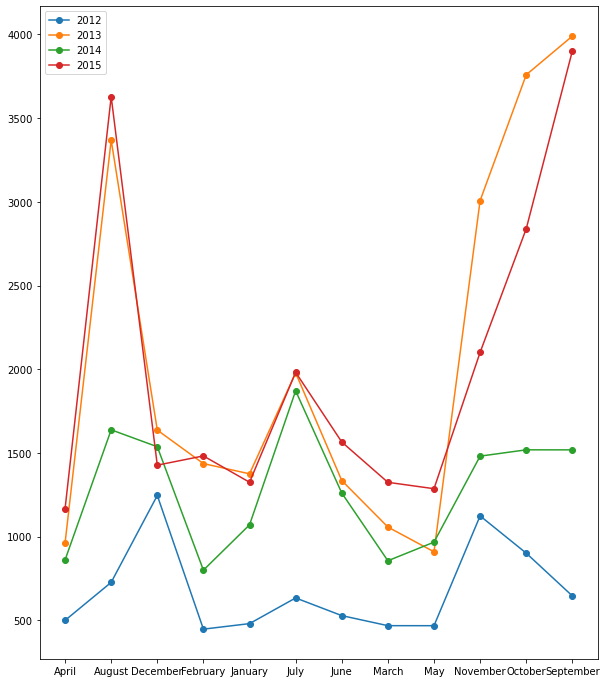

In [39]:
plt.figure(figsize=(10,12))
plt.plot(plot_data,label=cols,marker='o')
plt.legend()

plt.show()

In [187]:
d3=df.copy()

In [188]:
d3=d3.drop(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax', 'state', 'city'],axis=1)
d3=d3.groupby("date")[["priceMod"]].mean()
d3=d3.set_index("date")
print(d3.shape)

d3.head()
print(d3.shape)

KeyError: "None of ['date'] are in the columns"

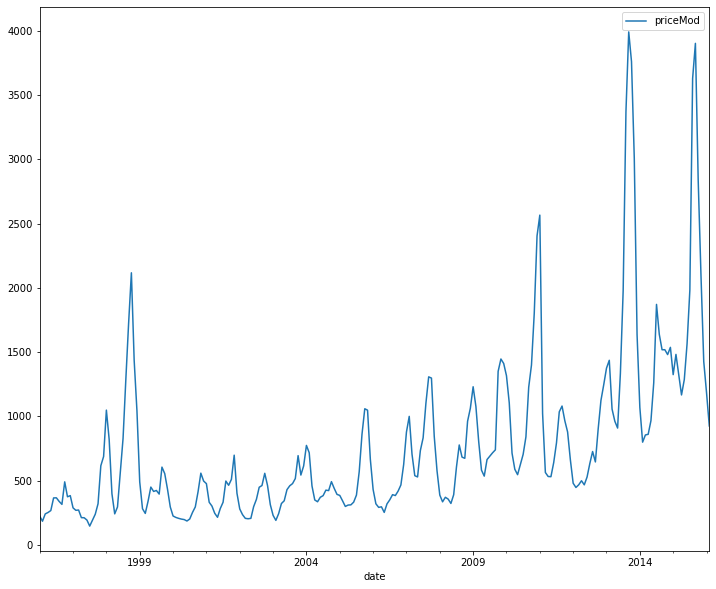

In [78]:
d3.plot(figsize=(12,10))
plt.show()

In [79]:
## Adf test to check data is stationary or not

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [81]:
def adf_test(data):
    res = adfuller(data)
    print('Test_Stat',res[0])
    print('p',res[1])
    if res[1] > 0.05:
        print('Ho accepted : Data is not Stationary')
    else:
        print('H1 accepted : Data is Stationary')

In [82]:
adf_test(d3)

Test_Stat -1.5529565759212167
p 0.5071710159736894
Ho accepted : Data is not Stationary


In [83]:
d4=d3.copy()

In [84]:
d4['Lag1'] = d4['priceMod'].shift(1)
d4['Lag2'] = d4['priceMod'].shift(2)
d4['Diff1'] = d4['priceMod'].diff(1)       # OR  d4['Value'] - d4['Lag1']
d4['Diff2'] = d4['priceMod'] - d4['Lag2']  # OR d4['Value'].diff(2) 
d4['Diff1_Lag1'] = d4['priceMod'].diff().shift(1)   
d4['Diff_Diff'] = d4['priceMod'].diff().diff()   
d4.head(8)

,priceMod,Lag1,Lag2,Diff1,Diff2,Diff1_Lag1,Diff_Diff
date,,,,,,,
1996-01-01,226.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-01,186.0,226.0,NaN,-40.0,NaN,NaN,NaN
1996-03-01,243.0,186.0,226.0,57.0,17.0,-40.0,97.0
1996-04-01,254.0,243.0,186.0,11.0,68.0,57.0,-46.0
1996-05-01,269.0,254.0,243.0,15.0,26.0,11.0,4.0
1996-06-01,367.0,269.0,254.0,98.0,113.0,15.0,83.0
1996-07-01,368.0,367.0,269.0,1.0,99.0,98.0,-97.0
1996-08-01,340.0,368.0,367.0,-28.0,-27.0,1.0,-29.0


In [85]:

adf_test(d3.diff(1).dropna())

Test_Stat -5.2872869941639555
p 5.81762786323471e-06
H1 accepted : Data is Stationary


In [108]:
adf_test(d3.diff().diff().dropna())

Test_Stat -8.618111527419037
p 6.210450231640707e-14
H1 accepted : Data is Stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\stats

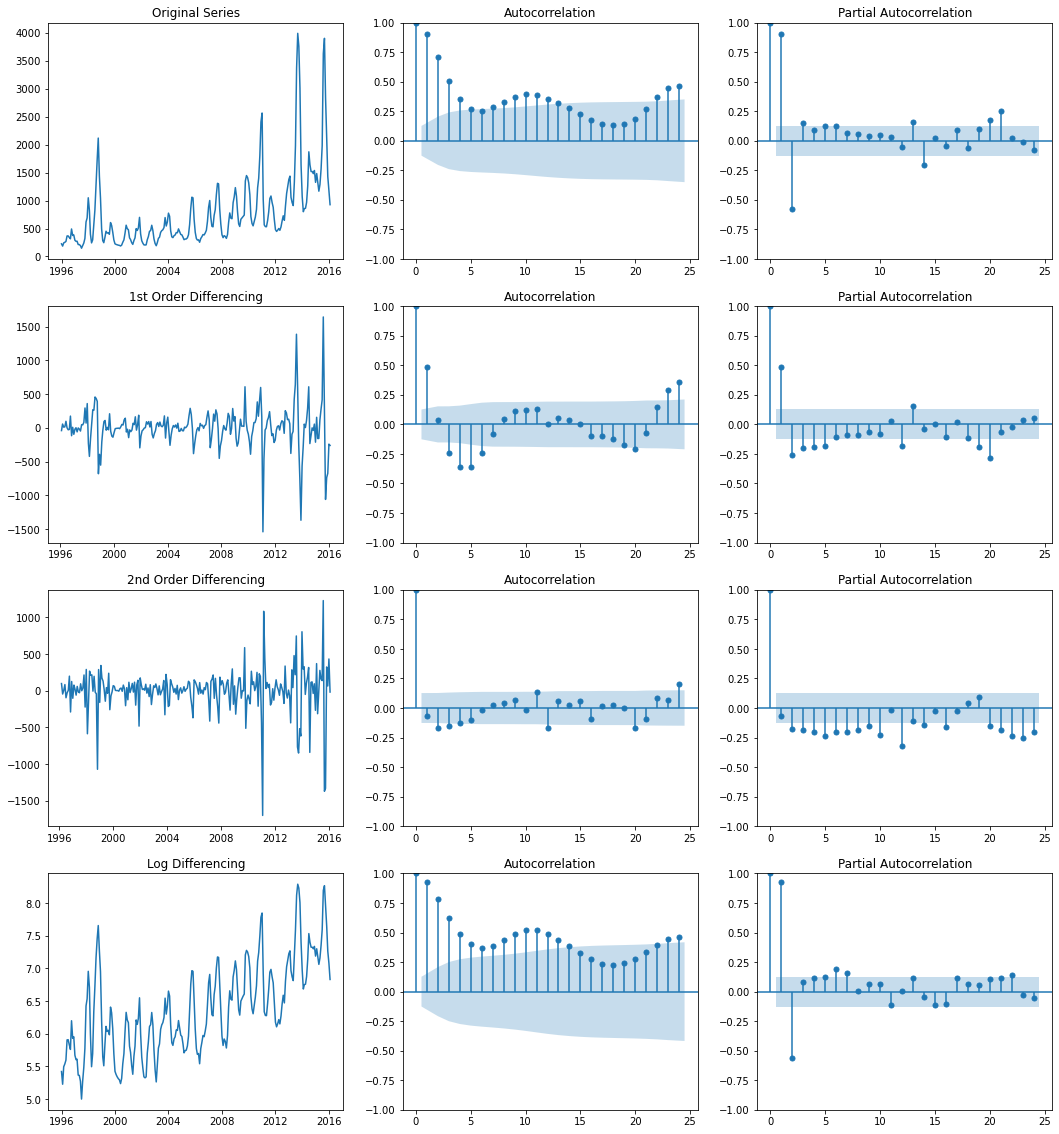

In [87]:
fig, axes = plt.subplots(4,3,figsize=(18,20))

# Original Data
axes[0,0].plot(d3)
axes[0,0].set_title('Original Series')
plot_acf(d3,ax=axes[0,1])
plot_pacf(d3,ax=axes[0,2])

# 1st differencing
axes[1,0].plot(d3.diff(1))
axes[1,0].set_title('1st Order Differencing')
plot_acf(d3.diff(1).dropna(),ax=axes[1,1])
plot_pacf(d3.diff(1).dropna(),ax=axes[1,2])

# 2nd differencing
axes[2,0].plot(d3.diff().diff())
axes[2,0].set_title('2nd Order Differencing')
plot_acf(d3.diff().diff().dropna(),ax=axes[2,1])
plot_pacf(d3.diff().diff().dropna(),ax=axes[2,2])

# log
axes[3,0].plot(np.log(d3))
axes[3,0].set_title('Log Differencing')
plot_acf(np.log(d3),ax=axes[3,1])
plot_pacf(np.log(d3),ax=axes[3,2])

plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


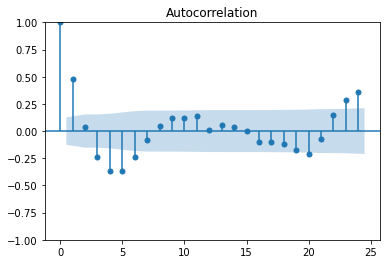

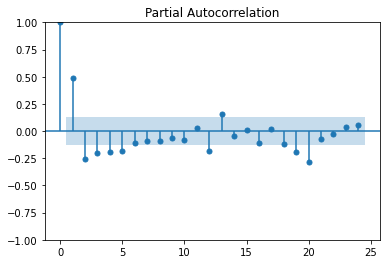

In [88]:
plot_acf(d3.diff(1).dropna(),)
plot_pacf(d3.diff(1).dropna())
plt.show()

### Split data

In [92]:
d3.shape

(242, 1)

In [93]:
(242*30)/100

72.6

In [94]:
242-72


170

In [109]:
d3_stationary = d3.diff(1).dropna()
d3_stationary1 = d3.diff().diff().dropna()

In [102]:
d3_stationary

,priceMod
date,
1996-02-01,-40.000000
1996-03-01,57.000000
1996-04-01,11.000000
1996-05-01,15.000000
1996-06-01,98.000000
...,...
2015-10-01,-1061.396678
2015-11-01,-737.732709
2015-12-01,-673.540051


In [103]:
adf_test(d3_stationary)

Test_Stat -5.2872869941639555
p 5.81762786323471e-06
H1 accepted : Data is Stationary


In [110]:
train = d3_stationary.iloc[:170]
test = d3_stationary.iloc[170:]
print(train.shape)
print(test.shape)

(170, 1)
(71, 1)


In [111]:
train1 = d3_stationary1.iloc[:170]
test1 = d3_stationary1.iloc[170:]
print(train1.shape)
print(test1.shape)

(170, 1)
(70, 1)


In [105]:
plist = list(range(1,9)) # 8
dlist = [1,2]            # 2
qlist = list(range(1,9)) # 8
print(8*2*8)

128


In [106]:
z

For Iteration 1,p=1,d=1,q=1,MSE=220615.55068225678
For Iteration 2,p=1,d=1,q=2,MSE=220476.01935976883
For Iteration 3,p=1,d=1,q=3,MSE=220432.8053223537
For Iteration 4,p=1,d=1,q=4,MSE=220364.01106072075
For Iteration 5,p=1,d=1,q=5,MSE=220205.8412225056
For Iteration 6,p=1,d=1,q=6,MSE=220729.8894907999
For Iteration 7,p=1,d=1,q=7,MSE=219717.97242589333
For Iteration 8,p=1,d=1,q=8,MSE=219473.59253114878
For Iteration 9,p=1,d=2,q=1,MSE=413315.5628066421
For Iteration 10,p=1,d=2,q=2,MSE=429797.30504134455
For Iteration 11,p=1,d=2,q=3,MSE=391204.78396733257
For Iteration 12,p=1,d=2,q=4,MSE=220372.5918813765
For Iteration 13,p=1,d=2,q=5,MSE=222845.67806764363
For Iteration 14,p=1,d=2,q=6,MSE=221903.31845122864
For Iteration 15,p=1,d=2,q=7,MSE=220714.66054290292
For Iteration 16,p=1,d=2,q=8,MSE=220197.18734173465
For Iteration 17,p=2,d=1,q=1,MSE=220332.18113867153
For Iteration 18,p=2,d=1,q=2,MSE=220752.69950950885
For Iteration 19,p=2,d=1,q=3,MSE=217543.46691729923
For Iteration 20,p=2,d=1,q

In [107]:
min_mse_arima

214928.3573511545

In [157]:
min_mse_arima = 99999999999999999999
pv = dv = qv = 0
c = 0
for i in plist:
    for j in dlist:
        for k in qlist:
            model = ARIMA(train1,order=(i,j,k))
            model_fit = model.fit()
            fcast = model_fit.forecast(len(test1))
            mse = mean_squared_error(test1,fcast)
            rmse = np.sqrt(mse)
            c += 1
            print(f'For Iteration {c},p={i},d={j},q={k},MSE={mse},rmse={rmse}')
            if mse <= min_mse_arima:
                min_mse_arima = mse
                pv = i
                dv = j
                qv = k 

For Iteration 1,p=1,d=1,q=1,MSE=224390.01291601453,rmse=473.69822980038094
For Iteration 2,p=1,d=1,q=2,MSE=224062.15489953803,rmse=473.3520411908435
For Iteration 3,p=1,d=1,q=3,MSE=224948.29016671446,rmse=474.2871389429767
For Iteration 4,p=1,d=1,q=4,MSE=224193.54585958176,rmse=473.4908086326299
For Iteration 5,p=1,d=1,q=5,MSE=224203.25780101214,rmse=473.5010642026184
For Iteration 6,p=1,d=1,q=6,MSE=224061.78408543058,rmse=473.35164950111937
For Iteration 7,p=1,d=1,q=7,MSE=224551.15069761316,rmse=473.8682841229334
For Iteration 8,p=1,d=1,q=8,MSE=224578.1972806305,rmse=473.8968213447211
For Iteration 9,p=1,d=2,q=1,MSE=238775.1654091199,rmse=488.6462579505955
For Iteration 10,p=1,d=2,q=2,MSE=224606.61860033326,rmse=473.92680721851264
For Iteration 11,p=1,d=2,q=3,MSE=225153.59548877977,rmse=474.5035252648602
For Iteration 12,p=1,d=2,q=4,MSE=224665.73952063304,rmse=473.9891765859565
For Iteration 13,p=1,d=2,q=5,MSE=224182.75794297492,rmse=473.4794165990481
For Iteration 14,p=1,d=2,q=6,MSE=

LinAlgError: LU decomposition error.

## Tes

In [135]:
def eval_model(test,pred,model_name):
    mae = mean_absolute_error(test,pred)
    mse = mean_squared_error(test,pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test,pred)
    res = pd.DataFrame({'MAE':mae,'MSE':mse,'RMSE':rmse,'MAPE':mape},index=[model_name])
    return res

def plot_res(train,test,fcast):
    plt.plot(train,label='Train')
    plt.plot(test,label='Test')
    plt.plot(fcast,label='Forecast')
    plt.legend()
    plt.show()

In [136]:
alpha = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5] 
beta =  [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
gamma = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
print(len(alpha),len(beta),len(gamma))
print(9*9*9)

9 9 9
729


ValueError: seasonal_periods has not been provided and index does not have a known freq. You must provide seasonal_periods

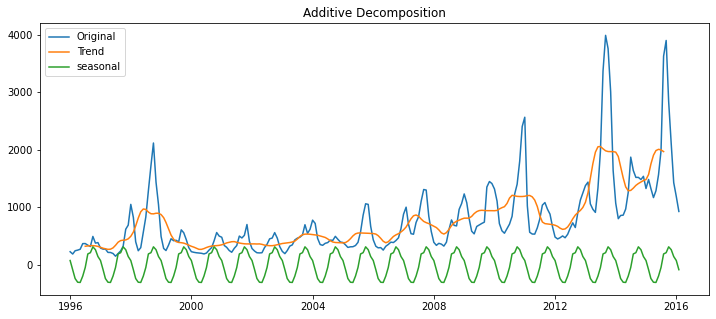

In [120]:
decom_add = seasonal_decompose(d3,model='add')

original = decom_add.observed
trend = decom_add.trend
seasonal = decom_add.seasonal

plt.figure(figsize=(12,5))
plt.plot(original,label='Original')
plt.plot(trend,label='Trend')
plt.plot(seasonal,label='seasonal')
plt.title('Additive Decomposition')
plt.legend()
plt.show()

In [128]:
df2.shape

(4354, 1)

In [130]:

adf_test(df2.diff(1).dropna())

Test_Stat -12.972710168225833
p 3.057428805562459e-24
H1 accepted : Data is Stationary


In [131]:
4354*30

130620

In [132]:
130620/100

1306.2

In [133]:
4354-1306

3048

In [146]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [145]:
df2_stationary=df2.diff(1).dropna()
# Example assuming 'date_column' is your datetime column
#df2_stationary['date'] = pd.to_datetime( df2_stationary['date'])
# d3.set_index('date_column', inplace=True)

# Set the frequency explicitly if it's not set
# Example assuming your frequency is monthly
#df2_stationary.index.freq = 'M'

In [139]:
train = df2_stationary.iloc[:3048]
test = df2_stationary.iloc[3048:]
print(train.shape)
print(test.shape)

(3048, 1)
(1305, 1)


In [150]:
min_mse = 9999999999999999
av = bv = gv = 0
c = 0
for i in alpha:
    for j in beta:
        for k in gamma:
            es = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=12)
            es_model = es.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k)
            fcast = es_model.forecast(len(test))
            mse = mean_squared_error(test,fcast)
            rmse = np.sqrt(mse)
            c += 1
            print(f'For Iteration {c},alpha={i},beta={j},gamma={k},MSE={mse}')
            if mse <= min_mse:
                min_mse = mse
                av = i
                bv = j
                gv = k 

For Iteration 1,alpha=0.1,beta=0.1,gamma=0.1,MSE=47248945.63028714
For Iteration 2,alpha=0.1,beta=0.1,gamma=0.15,MSE=67743557.0334375
For Iteration 3,alpha=0.1,beta=0.1,gamma=0.2,MSE=87470645.52336626
For Iteration 4,alpha=0.1,beta=0.1,gamma=0.25,MSE=105608472.47645023
For Iteration 5,alpha=0.1,beta=0.1,gamma=0.3,MSE=122194068.22413632
For Iteration 6,alpha=0.1,beta=0.1,gamma=0.35,MSE=137498262.81710258
For Iteration 7,alpha=0.1,beta=0.1,gamma=0.4,MSE=151818825.92147142
For Iteration 8,alpha=0.1,beta=0.1,gamma=0.45,MSE=165415233.00403586
For Iteration 9,alpha=0.1,beta=0.1,gamma=0.5,MSE=178484107.74240765
For Iteration 10,alpha=0.1,beta=0.15,gamma=0.1,MSE=108370446.54066195
For Iteration 11,alpha=0.1,beta=0.15,gamma=0.15,MSE=155140841.33431774
For Iteration 12,alpha=0.1,beta=0.15,gamma=0.2,MSE=200176075.43875462
For Iteration 13,alpha=0.1,beta=0.15,gamma=0.25,MSE=241736712.9959126
For Iteration 14,alpha=0.1,beta=0.15,gamma=0.3,MSE=279997301.01219547
For Iteration 15,alpha=0.1,beta=0.15,

For Iteration 119,alpha=0.15,beta=0.3,gamma=0.15,MSE=1060736298.2060584
For Iteration 120,alpha=0.15,beta=0.3,gamma=0.2,MSE=1415870391.0242596
For Iteration 121,alpha=0.15,beta=0.3,gamma=0.25,MSE=1747304413.7565837
For Iteration 122,alpha=0.15,beta=0.3,gamma=0.3,MSE=2062016935.6345906
For Iteration 123,alpha=0.15,beta=0.3,gamma=0.35,MSE=2374583639.794513
For Iteration 124,alpha=0.15,beta=0.3,gamma=0.4,MSE=2703055335.034153
For Iteration 125,alpha=0.15,beta=0.3,gamma=0.45,MSE=3068904656.2913065
For Iteration 126,alpha=0.15,beta=0.3,gamma=0.5,MSE=3498473011.7185802
For Iteration 127,alpha=0.15,beta=0.35,gamma=0.1,MSE=895233202.5109961
For Iteration 128,alpha=0.15,beta=0.35,gamma=0.15,MSE=1387411864.5174508
For Iteration 129,alpha=0.15,beta=0.35,gamma=0.2,MSE=1867577478.8798683
For Iteration 130,alpha=0.15,beta=0.35,gamma=0.25,MSE=2320145778.267395
For Iteration 131,alpha=0.15,beta=0.35,gamma=0.3,MSE=2756684658.0986886
For Iteration 132,alpha=0.15,beta=0.35,gamma=0.35,MSE=3200275372.38082

For Iteration 236,alpha=0.2,beta=0.5,gamma=0.15,MSE=41898063.3768913
For Iteration 237,alpha=0.2,beta=0.5,gamma=0.2,MSE=62443417.12959119
For Iteration 238,alpha=0.2,beta=0.5,gamma=0.25,MSE=22025083.38643484
For Iteration 239,alpha=0.2,beta=0.5,gamma=0.3,MSE=9329140.231951049
For Iteration 240,alpha=0.2,beta=0.5,gamma=0.35,MSE=201273403.10352102
For Iteration 241,alpha=0.2,beta=0.5,gamma=0.4,MSE=884238188.7117431
For Iteration 242,alpha=0.2,beta=0.5,gamma=0.45,MSE=2455800234.3471584
For Iteration 243,alpha=0.2,beta=0.5,gamma=0.5,MSE=5196788098.745407
For Iteration 244,alpha=0.25,beta=0.1,gamma=0.1,MSE=107916510.10378236
For Iteration 245,alpha=0.25,beta=0.1,gamma=0.15,MSE=181248841.86753613
For Iteration 246,alpha=0.25,beta=0.1,gamma=0.2,MSE=246683223.4107358
For Iteration 247,alpha=0.25,beta=0.1,gamma=0.25,MSE=300498282.28933877
For Iteration 248,alpha=0.25,beta=0.1,gamma=0.3,MSE=342257613.7883434
For Iteration 249,alpha=0.25,beta=0.1,gamma=0.35,MSE=373385383.1011535
For Iteration 250

For Iteration 352,alpha=0.3,beta=0.25,gamma=0.1,MSE=92264922.92541301
For Iteration 353,alpha=0.3,beta=0.25,gamma=0.15,MSE=293458527.6599504
For Iteration 354,alpha=0.3,beta=0.25,gamma=0.2,MSE=481374688.328047
For Iteration 355,alpha=0.3,beta=0.25,gamma=0.25,MSE=602012180.6460689
For Iteration 356,alpha=0.3,beta=0.25,gamma=0.3,MSE=625803655.4194968
For Iteration 357,alpha=0.3,beta=0.25,gamma=0.35,MSE=576306965.6124253
For Iteration 358,alpha=0.3,beta=0.25,gamma=0.4,MSE=474025940.1371232
For Iteration 359,alpha=0.3,beta=0.25,gamma=0.45,MSE=340921983.11105525
For Iteration 360,alpha=0.3,beta=0.25,gamma=0.5,MSE=193699953.03462547
For Iteration 361,alpha=0.3,beta=0.3,gamma=0.1,MSE=12414805.674995324
For Iteration 362,alpha=0.3,beta=0.3,gamma=0.15,MSE=134089600.34015617
For Iteration 363,alpha=0.3,beta=0.3,gamma=0.2,MSE=288819843.24239767
For Iteration 364,alpha=0.3,beta=0.3,gamma=0.25,MSE=376008450.5210309
For Iteration 365,alpha=0.3,beta=0.3,gamma=0.3,MSE=361446449.2405244
For Iteration 3

For Iteration 468,alpha=0.35,beta=0.4,gamma=0.5,MSE=5.679984044421108e+32
For Iteration 469,alpha=0.35,beta=0.45,gamma=0.1,MSE=253038471.72820634
For Iteration 470,alpha=0.35,beta=0.45,gamma=0.15,MSE=553968370.2299324
For Iteration 471,alpha=0.35,beta=0.45,gamma=0.2,MSE=106771596.3468646
For Iteration 472,alpha=0.35,beta=0.45,gamma=0.25,MSE=5287714195.555311
For Iteration 473,alpha=0.35,beta=0.45,gamma=0.3,MSE=41341650144.765274
For Iteration 474,alpha=0.35,beta=0.45,gamma=0.35,MSE=2003237348.7149568
For Iteration 475,alpha=0.35,beta=0.45,gamma=0.4,MSE=992615272.8346885
For Iteration 476,alpha=0.35,beta=0.45,gamma=0.45,MSE=1.6182504606916215e+43
For Iteration 477,alpha=0.35,beta=0.45,gamma=0.5,MSE=1.3227498279550665e+68
For Iteration 478,alpha=0.35,beta=0.5,gamma=0.1,MSE=118662934.28320801
For Iteration 479,alpha=0.35,beta=0.5,gamma=0.15,MSE=198381429.77079397
For Iteration 480,alpha=0.35,beta=0.5,gamma=0.2,MSE=20403935475.661613
For Iteration 481,alpha=0.35,beta=0.5,gamma=0.25,MSE=184

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [152]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming d3 is your DataFrame or Series
df2_stationary = df2.diff(1).dropna()

# Set the frequency explicitly to 'M' for monthly data
#df2_stationary.index.freq = 'M'

# Identify p, d, and q parameters based on ACF and PACF plots or using other methods
p = 1  # example
d = 1  # example
q = 1  # example

# Set the seasonal period to 12 for monthly data
seasonal_period = 12

# Fit the ARIMA model with seasonal component
model = ARIMA(df2_stationary, order=(p, d, q), seasonal_order=(0, 0, 0, seasonal_period))
results = model.fit()

# Summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                 4353
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34985.219
Date:                Mon, 29 Jan 2024   AIC                          69976.437
Time:                        13:09:24   BIC                          69995.572
Sample:                             0   HQIC                         69983.191
                               - 4353                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5648      0.008    -73.241      0.000      -0.580      -0.550
ma.L1         -0.9999      0.066    -15.150      0.000      -1.129      -0.871
sigma2      5.613e+05   3.65e+04     15.385      0.0

In [154]:
alpha = 0.2  # example
beta = 0.2   # example
gamma = 0.2  # example

# Set the seasonal period to 12 for monthly data
seasonal_period = 12

# Fit the Triple Exponential Smoothing model
model = ExponentialSmoothing(df2_stationary, trend='add', seasonal='add', seasonal_periods=seasonal_period)
results = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
forecast_periods = 12  
# Make predictions
predictions = results.predict(start=len(d3), end=len(d3) + forecast_periods - 1)

# Print the summary
print(results.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 priceMod   No. Observations:                 4353
Model:             ExponentialSmoothing   SSE                     4721831581.088
Optimized:                         True   AIC                          60524.954
Trend:                         Additive   BIC                          60627.011
Seasonal:                      Additive   AICC                         60525.111
Seasonal Periods:                    12   Date:                 Mon, 29 Jan 2024
Box-Cox:                          False   Time:                         13:12:48
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2000000                alpha                False
smoothing_trend          

AttributeError: 'HoltWintersResults' object has no attribute 'rmse'